In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/penguins_size.csv")

In [20]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [21]:
df = df.dropna()

In [22]:
X = pd.get_dummies(df.drop('species', axis = 1), drop_first=True)

In [23]:
y = df.species

In [24]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: object

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model = RandomForestClassifier()

In [29]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
preds = model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [32]:
confusion_matrix(y_test,preds)

array([[41,  0,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

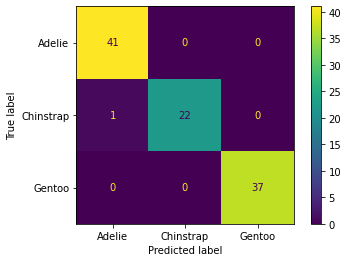

In [33]:
plot_confusion_matrix(model,X_test,y_test)

In [34]:
model.feature_importances_

array([0.33713791, 0.13749296, 0.23116632, 0.15463204, 0.09763723,
       0.02906793, 0.00613418, 0.00673143])

In [35]:
error = []

for i in range(1,20):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    error.append(accuracy_score(y_test, test_preds))

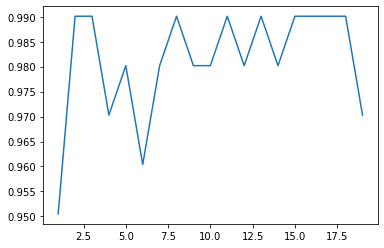

In [43]:
plt.plot(range(1,20), error)